In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [34]:
df = pd.read_csv('income.csv')
df.head()
x = df[['Age', 'Income($)']]


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x = pd.DataFrame(std_x, columns=['Age', 'Income($)'])

In [36]:
model = KMeans(n_clusters=3)
result = model.fit_predict(std_x)

/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Age', ylabel='Income($)'>

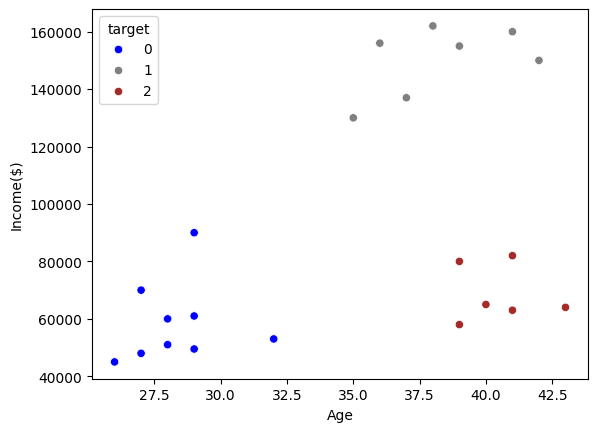

In [41]:
df['target'] = result
std_x['target'] = result
colors = {0: "blue", 1: "grey", 2: "brown"}
sns.scatterplot(data=df, x='Age', y='Income($)', hue='target', palette=colors)

In [38]:
centeroids = model.cluster_centers_
centeroids

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

(array([-1.1247901 ,  0.60143983,  0.98550535]),
 array([-0.74862223,  1.40141653, -0.51205261]))

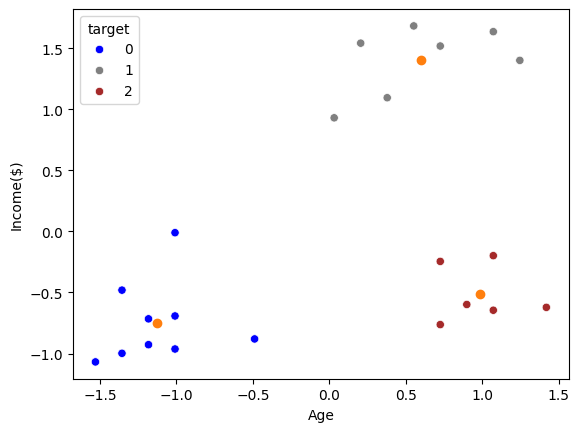

In [42]:
sns.scatterplot(data=std_x, x='Age', y='Income($)', hue='target', palette=colors)
plt.scatter(centeroids[:, 0], centeroids[:, 1])
centeroids[:, 0], centeroids[:, 1]

/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/afsal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

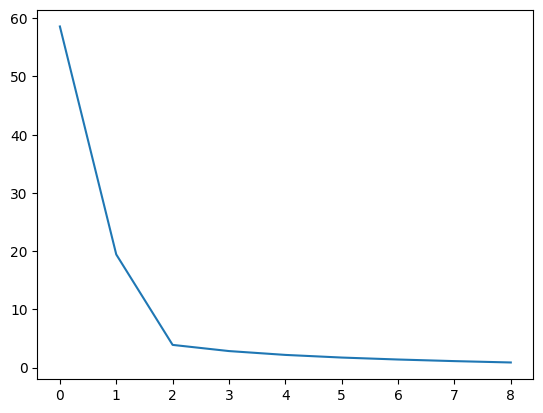

In [52]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(std_x)
    sse.append(km.inertia_)

# plots data from list index to len(list) to plot if x is not given
plt.plot(sse)
